In [17]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from coins_utils import *
from sklearn.decomposition import PCA
from pylab import demean

In [25]:
def image_svd(image,imageDir):
    imagePath = imageDir+image
    im = Image.open(imagePath)
    plt.imshow(im)
    plt.show()
    imarray = np.array(im)
    imarrayyuv = cv2.cvtColor(imarray, cv2.COLOR_RGB2YUV) #Conversion to YUV format
    imy,imu,imv = cv2.split(imarrayyuv)
    imyd = demean(imy)
    imyd = demean(imyd,axis=1)
    u,s,w = np.linalg.svd(imyd)
    imyNew = np.dot(u,np.dot(np.diag(s),w))
    imyNew = imyNew.astype(np.uint8)
    print(s)
    return s

--- SVD OF IMAGE 1 ---



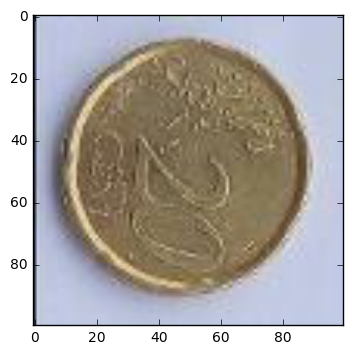

[  1.39657409e+03   1.24288809e+03   8.45832529e+02   7.02442393e+02
   5.78393969e+02   5.23139635e+02   4.64715957e+02   4.07475313e+02
   3.90505489e+02   3.39436368e+02   3.22987034e+02   3.19196951e+02
   2.96591612e+02   2.85368193e+02   2.78054597e+02   2.76503746e+02
   2.65953990e+02   2.56168298e+02   2.38491327e+02   2.34131531e+02
   2.26283433e+02   2.20733679e+02   2.14558767e+02   2.12545302e+02
   2.01082535e+02   1.96027888e+02   1.91140933e+02   1.86255990e+02
   1.83420996e+02   1.74044840e+02   1.70934111e+02   1.61930517e+02
   1.60211913e+02   1.57681650e+02   1.56204021e+02   1.52630014e+02
   1.46969235e+02   1.45862478e+02   1.39738912e+02   1.33851861e+02
   1.32036395e+02   1.27767503e+02   1.24927136e+02   1.21467821e+02
   1.19972524e+02   1.13760030e+02   1.10818651e+02   1.09327147e+02
   1.03472147e+02   1.01437379e+02   9.85011819e+01   9.35835274e+01
   9.02437704e+01   8.68365019e+01   8.58529823e+01   8.06344536e+01
   7.64473818e+01   7.02455331e+01

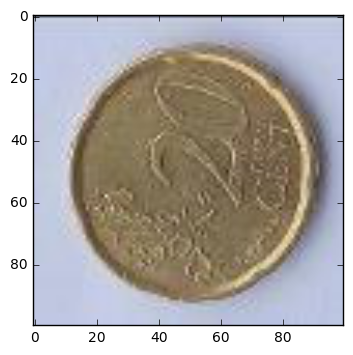

[  1.39566078e+03   1.23767888e+03   8.39463332e+02   6.88238133e+02
   5.65875385e+02   5.17449616e+02   4.62720517e+02   4.15701899e+02
   3.79008505e+02   3.42870463e+02   3.15396359e+02   3.13926502e+02
   2.98903810e+02   2.88546110e+02   2.75181667e+02   2.69649287e+02
   2.61213329e+02   2.52292888e+02   2.44064229e+02   2.39138365e+02
   2.33016474e+02   2.24961312e+02   2.21988168e+02   2.20629204e+02
   2.15607012e+02   2.12026347e+02   2.05166149e+02   1.96609368e+02
   1.91844184e+02   1.82531161e+02   1.80732183e+02   1.74872449e+02
   1.69230964e+02   1.63616942e+02   1.60794229e+02   1.57004288e+02
   1.53296882e+02   1.50956346e+02   1.43415722e+02   1.39344127e+02
   1.35995460e+02   1.31639218e+02   1.27567590e+02   1.22542368e+02
   1.18251597e+02   1.10658616e+02   1.08908675e+02   1.06358224e+02
   1.02862427e+02   9.76855100e+01   9.31851136e+01   9.21767472e+01
   9.00196328e+01   8.54491815e+01   8.35166256e+01   8.03701810e+01
   7.75155270e+01   7.35399285e+01

In [26]:
# Test with SVDs with the same coin but rotated

TRAIN_DIR = 'CandidateDataSet2/augmented_and_resized_brightness_yuv_RAW/50centVs20centVs10cent/'

imageTest1 = 'P70210-172856_Candidate_6_Aug_100_270_Brightness_0.jpg'
imageTest2 = 'P70210-172856_Candidate_6_Aug_100_90_Brightness_0.jpg'

print("--- SVD OF IMAGE 1 ---\n")
s1 = image_svd(imageTest1,TRAIN_DIR)
print("--- SVD OF IMAGE 2 ---\n")
s2 = image_svd(imageTest2,TRAIN_DIR)
sdiff = s1-s2
print("--- RELATIVE DIFFERENCE ---\n")
print(np.divide(sdiff,s1))

--- SVD OF IMAGE 1 ---



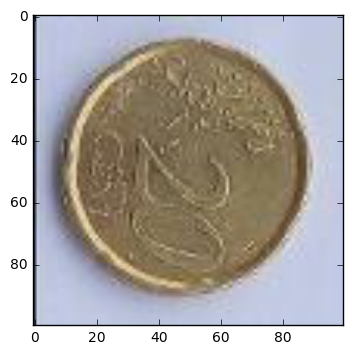

[  1.39657409e+03   1.24288809e+03   8.45832529e+02   7.02442393e+02
   5.78393969e+02   5.23139635e+02   4.64715957e+02   4.07475313e+02
   3.90505489e+02   3.39436368e+02   3.22987034e+02   3.19196951e+02
   2.96591612e+02   2.85368193e+02   2.78054597e+02   2.76503746e+02
   2.65953990e+02   2.56168298e+02   2.38491327e+02   2.34131531e+02
   2.26283433e+02   2.20733679e+02   2.14558767e+02   2.12545302e+02
   2.01082535e+02   1.96027888e+02   1.91140933e+02   1.86255990e+02
   1.83420996e+02   1.74044840e+02   1.70934111e+02   1.61930517e+02
   1.60211913e+02   1.57681650e+02   1.56204021e+02   1.52630014e+02
   1.46969235e+02   1.45862478e+02   1.39738912e+02   1.33851861e+02
   1.32036395e+02   1.27767503e+02   1.24927136e+02   1.21467821e+02
   1.19972524e+02   1.13760030e+02   1.10818651e+02   1.09327147e+02
   1.03472147e+02   1.01437379e+02   9.85011819e+01   9.35835274e+01
   9.02437704e+01   8.68365019e+01   8.58529823e+01   8.06344536e+01
   7.64473818e+01   7.02455331e+01

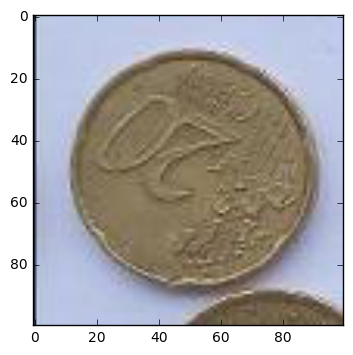

[  1.72228743e+03   1.36344380e+03   1.12564274e+03   7.36499531e+02
   6.66473316e+02   5.19809356e+02   4.56043619e+02   4.30640833e+02
   3.58396537e+02   3.21465038e+02   2.97802745e+02   2.88887378e+02
   2.77852675e+02   2.69866195e+02   2.53133755e+02   2.40205575e+02
   2.33842749e+02   2.22339879e+02   2.14169028e+02   2.05315299e+02
   2.03957366e+02   1.97192793e+02   1.92580933e+02   1.86339959e+02
   1.81652657e+02   1.77573189e+02   1.69899262e+02   1.66207590e+02
   1.62268290e+02   1.55845546e+02   1.53992075e+02   1.48841901e+02
   1.44529993e+02   1.42932158e+02   1.40674833e+02   1.36811913e+02
   1.33786557e+02   1.30121730e+02   1.24351613e+02   1.18398586e+02
   1.17924572e+02   1.13331794e+02   1.09631102e+02   1.08376001e+02
   1.06272388e+02   1.01290326e+02   9.77577258e+01   9.53488204e+01
   9.14718793e+01   8.81904813e+01   8.49937896e+01   8.32153968e+01
   7.93094183e+01   7.54530880e+01   7.38736678e+01   7.08150140e+01
   6.96476302e+01   6.80012751e+01

In [27]:
# Test with SVDs with different coins of the same kind

imageTest1 = 'P70210-172856_Candidate_6_Aug_100_270_Brightness_0.jpg'
imageTest2 = 'P70210-173432_Candidate_3_Aug_100_270_Brightness_0.jpg'

print("--- SVD OF IMAGE 1 ---\n")
s1 = image_svd(imageTest1,TRAIN_DIR)
print("--- SVD OF IMAGE 2 ---\n")
s2 = image_svd(imageTest2,TRAIN_DIR)
sdiff = s1-s2
print("--- RELATIVE DIFFERENCE ---\n")
print(np.divide(sdiff,s1))

--- SVD OF IMAGE 1 ---



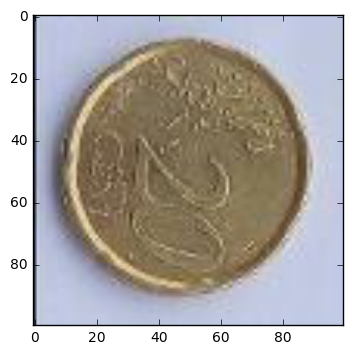

[  3.21954705e+03   1.28925680e+03   8.57145559e+02   7.05726206e+02
   5.83834741e+02   5.23170040e+02   4.67092426e+02   4.07536390e+02
   3.91679286e+02   3.39446952e+02   3.23178033e+02   3.19457851e+02
   2.96644158e+02   2.85495353e+02   2.78228170e+02   2.76506737e+02
   2.66309200e+02   2.56703125e+02   2.39392169e+02   2.34133376e+02
   2.26300001e+02   2.21489315e+02   2.14716163e+02   2.12545543e+02
   2.01252143e+02   1.96036910e+02   1.91171484e+02   1.86275871e+02
   1.83661325e+02   1.74189852e+02   1.70948655e+02   1.62131307e+02
   1.60475242e+02   1.57737486e+02   1.56769433e+02   1.52639203e+02
   1.47047673e+02   1.45868993e+02   1.39751386e+02   1.33852211e+02
   1.32042597e+02   1.28004595e+02   1.24927479e+02   1.21630221e+02
   1.20115325e+02   1.13834139e+02   1.10993631e+02   1.09408732e+02
   1.03476135e+02   1.01501195e+02   9.85039947e+01   9.35884235e+01
   9.03154396e+01   8.69354440e+01   8.59207686e+01   8.09392819e+01
   7.65787525e+01   7.03135155e+01

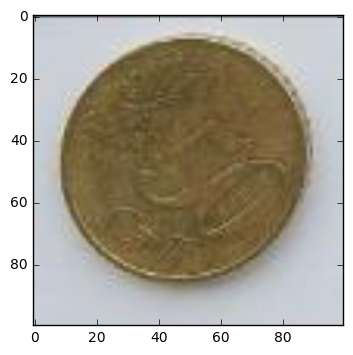

[  3.98842691e+03   1.67946887e+03   8.62419909e+02   6.22230595e+02
   5.40802105e+02   4.15642700e+02   3.38230218e+02   3.09357534e+02
   2.61660350e+02   2.53034702e+02   2.27542437e+02   2.25663208e+02
   2.23858573e+02   2.11633091e+02   2.04350335e+02   1.95773939e+02
   1.93882232e+02   1.79564123e+02   1.76206862e+02   1.68624811e+02
   1.61361032e+02   1.57487168e+02   1.48349244e+02   1.47793807e+02
   1.43191059e+02   1.34982361e+02   1.31133369e+02   1.25246578e+02
   1.18915564e+02   1.16836203e+02   1.16226857e+02   1.10269394e+02
   1.08018493e+02   1.03088548e+02   9.89068769e+01   9.67476279e+01
   9.41393013e+01   8.95579125e+01   8.20148026e+01   7.87666545e+01
   7.69987153e+01   7.29099903e+01   6.67503001e+01   6.36988201e+01
   6.27105143e+01   6.24807374e+01   6.07063514e+01   5.41162684e+01
   5.34415692e+01   5.19552393e+01   4.96052950e+01   4.57134233e+01
   4.25409135e+01   4.10922865e+01   4.04466087e+01   3.82286397e+01
   3.70783124e+01   3.50874141e+01

In [24]:
# Test with SVDs with different coins 

imageTest1 = 'P70210-172856_Candidate_6_Aug_100_270_Brightness_0.jpg'
imageTest2 = 'P70210-165415_Candidate_1_Aug_100_90_Brightness_0.jpg'

print("--- SVD OF IMAGE 1 ---\n")
s1 = image_svd(imageTest1,TRAIN_DIR)
print("--- SVD OF IMAGE 2 ---\n")
s2 = image_svd(imageTest2,TRAIN_DIR)
sdiff = s1-s2
print("--- RELATIVE DIFFERENCE ---\n")
print(np.divide(sdiff,s1))

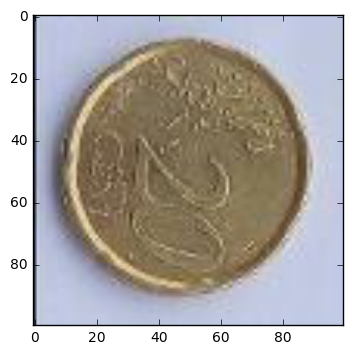

[  6.40641275e-01   1.02731641e-01   4.54082246e-02   3.07820722e-02
   2.10671231e-02   1.69165227e-02   1.34843809e-02   1.02649810e-02
   9.48170792e-03   7.12146249e-03   6.45518999e-03   6.30743082e-03
   5.43872330e-03   5.03759734e-03   4.78440088e-03   4.72538065e-03
   4.38326477e-03   4.07274928e-03   3.54197297e-03   3.38806722e-03
   3.16515129e-03   3.03201206e-03   2.84940931e-03   2.79208972e-03
   2.50326248e-03   2.37520480e-03   2.25876780e-03   2.14456181e-03
   2.08478267e-03   1.87530133e-03   1.80616217e-03   1.62464744e-03
   1.59162754e-03   1.53778349e-03   1.51896630e-03   1.43998359e-03
   1.33641603e-03   1.31507746e-03   1.20708432e-03   1.10732846e-03
   1.07758981e-03   1.01268991e-03   9.64586803e-04   9.14341335e-04
   8.91707060e-04   8.00885477e-04   7.61415091e-04   7.39825561e-04
   6.61767996e-04   6.36748118e-04   5.99698620e-04   5.41339387e-04
   5.04137918e-04   4.67109948e-04   4.56269743e-04   4.04896533e-04
   3.62444854e-04   3.05564563e-04

In [44]:
# Trying PCA

imagePath = TRAIN_DIR+imageTest1

im = Image.open(imagePath)
plt.imshow(im)
plt.show()
imarray = np.array(im)
imarrayyuv = cv2.cvtColor(imarray, cv2.COLOR_RGB2YUV) #Conversion to YUV format
imy,imu,imv = cv2.split(imarrayyuv)
imyd = demean(imy)
#imyd = demean(imyd,axis=1)

pca = PCA()
pca.fit(imyd)

xt = pca.transform(imyd)
xti = pca.inverse_transform(xt)
print(pca.explained_variance_ratio_) 

print("--- ORIGINAL---")
print(imyd)
print("--- TRANSFORMED ---")
print(xt)
print("--- BACK ---")
print(xti)